# **PROJECT NAME - HEALTH INSUARANCE CROSS SELL PREDICTION**

##### **Project Type**    - Calssification
##### **Contribution**    - Individual
##### **NAME -**            Vinay

# **Project Summary -**

* The goal of this project is to predict the likelihood of cross-selling vehicle insurance to existing customers of an insurance company. The dataset provided contains various customer attributes and their response to the insurance offer. By leveraging machine learning techniques, we aim to develop a predictive model that can identify potential customers interested in purchasing vehicle insurance.

* The dataset includes features such as customer demographics (gender, age), driving license status, region code, previous insurance history, vehicle age, vehicle damage status, annual premium, policy sales channel, and customer vintage. The target variable indicates whether a customer expressed interest in the insurance offer or not.

* The successful completion of this project will provide the insurance company with a predictive model capable of identifying potential customers interested in purchasing vehicle insurance. This information can be utilized to optimize marketing strategies, enhance customer targeting, and improve the overall cross-selling success rate.



# **GitHub Link -**

# **Problem Statement**

* Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

* An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

* For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

* Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

* Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

* Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# ***Let's Begin !***

## ***1. Know Your Data***

In [69]:
# importing libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


### Dataset Loading

In [71]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
#importing dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

In [73]:
#reading dataset :
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [74]:
# Dataset Rows & Columns count
df.shape

(381109, 12)

### Dataset Information

In [75]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Missing Values/Null Values

In [76]:
# missing valuse or null values count :
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### What did you know about your dataset?

*  from seeing the dataset it is clear that is a categorical dataset.

* initially there are 12 colunms and 381109 rows in the dataset.

* from 12 colunms 3 are float, 6 are integer, and 3 are object.

* There are no null or missing  values in the dataset.


## ***2. Understanding Your Variables***

In [77]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [78]:
# describing dataset :
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

* The  colunms are id, Gender, Age, Driving_License,
 Region_Code,Previously_Insured, Vehicle_Age, Vehicle_Damage,Annual_Premium, Policy_Sales_Channel, Vintage, Response.

* The minimum age of insurer is 20 and maximum is 85 with average age of 38.

* maximum people have driving license.

* more person are not insured before.

* Minimum insurance Annual Premium is 2630 and maximum is 540165 with average is 30564.

* maximum number of days a custumer is associatied with the company is 164 days with an average of 154 days.

* In the age,Annual_Premium,  column there are some outliers


## 3. ***Data Wrangling***

### Data Wrangling Code

In [79]:
# removing not needed colunm :
df = df.drop(columns=['id'])


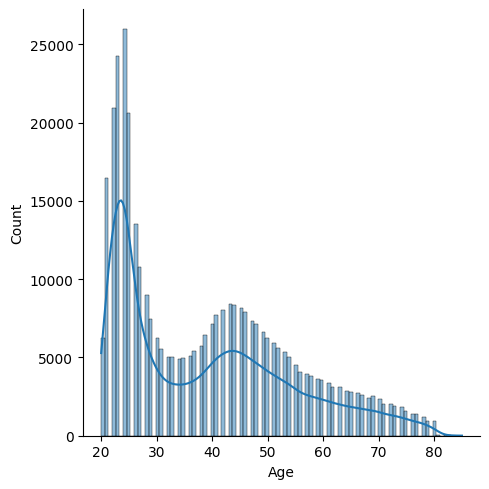

In [80]:
# checking outliers age col :
sns.displot(df.Age, kde = True)
plt.show()

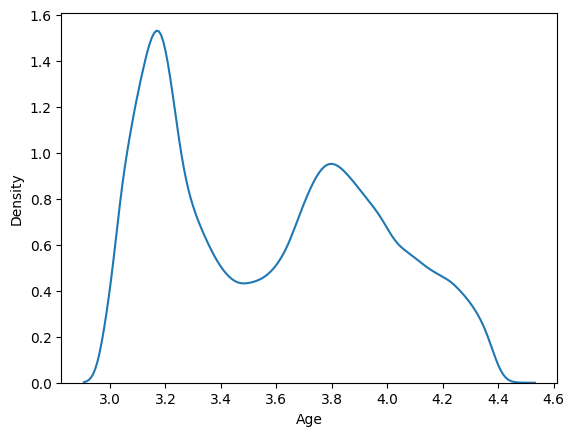

In [81]:
# transforming the age colunm :
df['Age'] = np.log(df['Age'])
sns.kdeplot(df.Age)
plt.show()

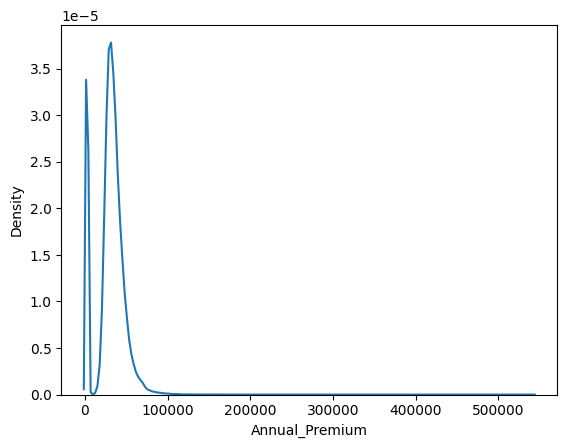

In [82]:
#ploting Anual premimum :
sns.kdeplot(df.Annual_Premium)
plt.show()

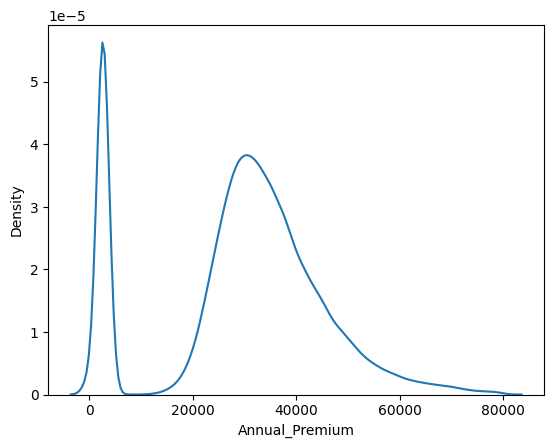

In [83]:
# handling the data :
df["Annual_Premium"] = np.where(df["Annual_Premium"] > 80000, 0, df["Annual_Premium"])
sns.kdeplot(df.Annual_Premium)
plt.show()

### What all manipulations have you done and insights you found?

* Firstly i droped the id colunm as it was unique for every row.

* then i found outliers in the colunms such as age and Annual_Premium.

* In Age colunm the age was highly skewed towards left hence i used Log to make it evenly distributed.

* In the Annual premium colunm the data was highly unstable so i removed annual premium more than 80000.

* Lastly i converted some numeric variable into categorical for better visualization.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Exploratory Data Analysis (EDA)**

### 1.Bivariate Analysis:

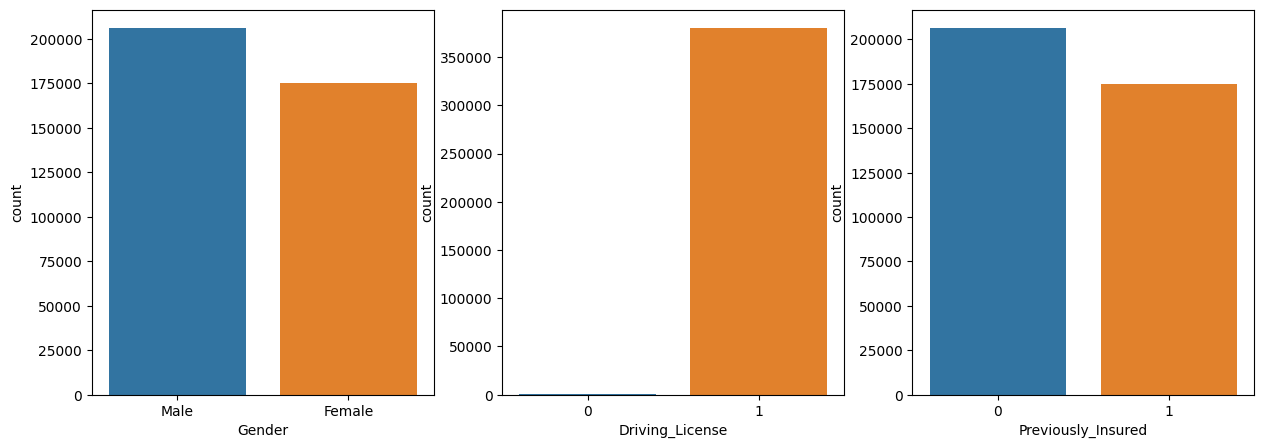

In [84]:
# ploting genders, driving license, previously insured :
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
sns.countplot(data = df,x ='Gender', ax = axes[0])
sns.countplot(data = df,x ='Driving_License', ax = axes[1])
sns.countplot(data = df,x ='Previously_Insured', ax = axes[2])
plt.show()

* from gender we can see that number of males are more as compared to female

* we sholud drop the driving license colunm  as it has only one value 1.

* number of people how are previously insured are less as compared to those who are not previously insured.  

In [85]:
# droping the driving_license :
df = df.drop(columns=['Driving_License'])

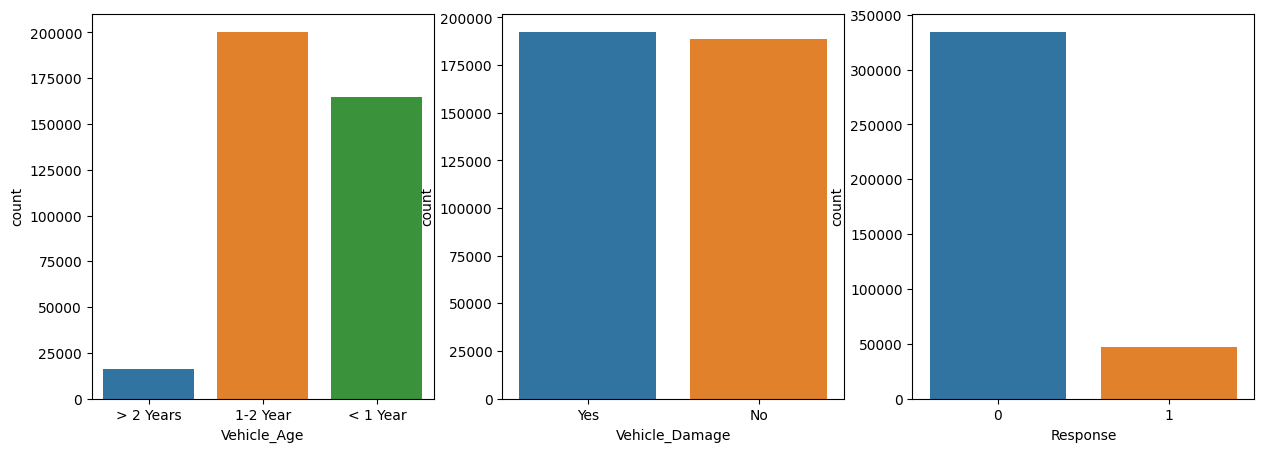

In [86]:
#ploting Vehicle_Age, Vehicle_Damage, Response :
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
sns.countplot(x = df['Vehicle_Age'],ax = axes[0])
sns.countplot(x = df['Vehicle_Damage'], ax = axes[1])
sns.countplot(x = df['Response'], ax = axes[2])
plt.show()

* most of the vehicle are between 1-2 year of age follwed by less than 1 year.vehicle with more than 2 years of age are really less.

* distribution vehicle damage is almost even with slightly an edge to yes.

*  from the response column it can it is clearly seen that the most of the respose are negative(0).

### 2. Multivariate analysis

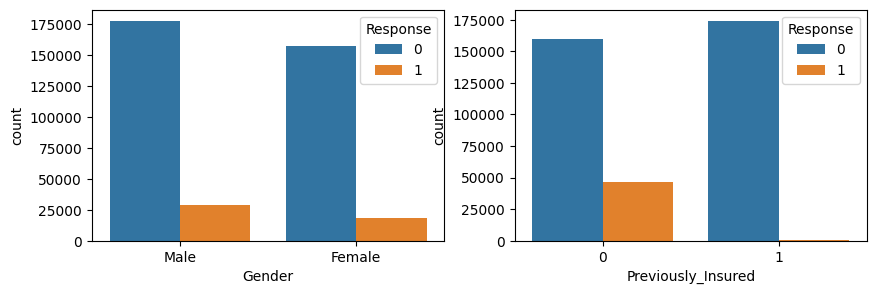

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=False)
sns.countplot(data=df,x='Gender',hue='Response',ax = axes[0])
sns.countplot(data=df,x='Previously_Insured',hue='Response', ax = axes[1])
plt.show()

* males are more intersted in buying the insurance as compared to female this could be because of the count of male is also high.

* The people who do not have insuarance previously are more intrested in buying it then people how already have.

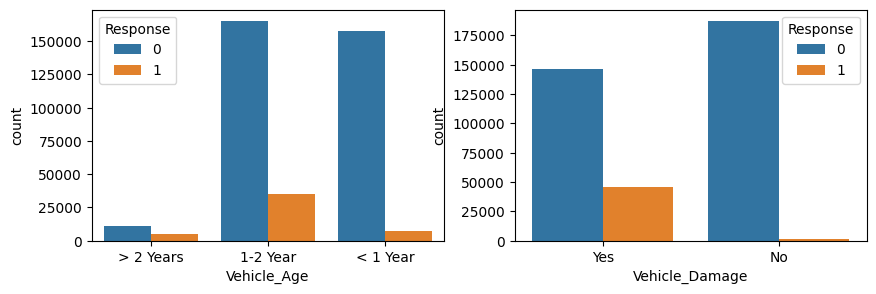

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=False)
sns.countplot(x = df['Vehicle_Age'],hue = df['Response'], ax = axes[0])
sns.countplot(x = df['Vehicle_Damage'],hue = df['Response'], ax = axes[1])

plt.show()

* vehicle owner whose vehicle's age is between 1-2 year are more intrested in buying insurance.

* Vehicle with damage are more intrested in buying the insurance rather then those who do not have damage.

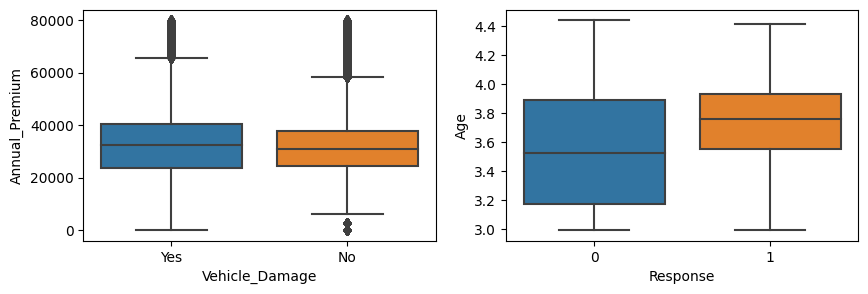

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=False)
sns.boxplot(data=df, x='Vehicle_Damage', y='Annual_Premium',ax = axes[0])
sns.boxplot(data=df, x='Response', y='Age', ax = axes[1])
plt.show()


*  From the chart it can be seen that vehicle with damage have slightly high premium compared to vehicle without damage.

* people whose age is more than 35 age are more intrested in buying insurance.


# Corelation :

In [90]:
# making data ready for heatmap:
corr_pearson = df.corr(method = 'pearson')

<ipython-input-90-45f0a91d279e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_pearson = df.corr(method = 'pearson')


<Axes: >

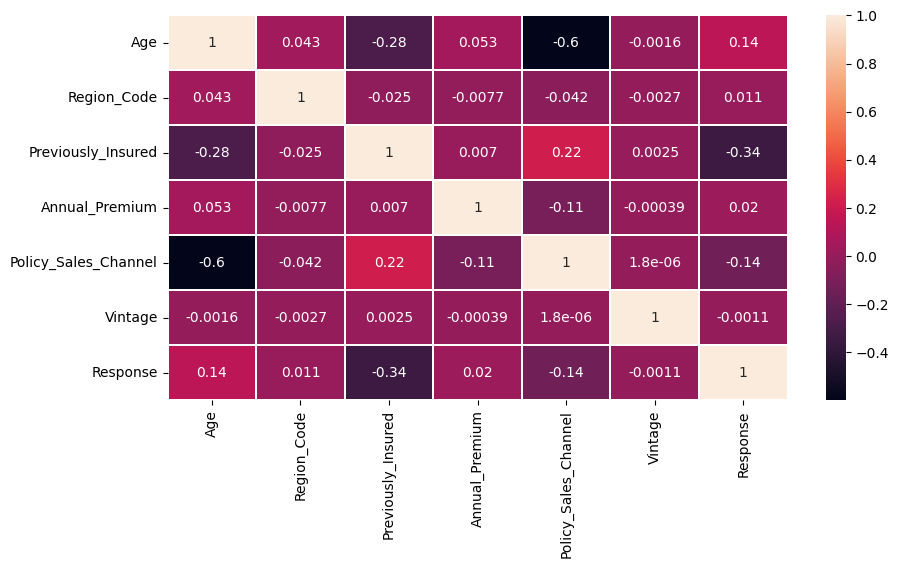

In [91]:
# heatmap
fig, axes = plt.subplots(1, figsize=(10,5))
sns.heatmap(corr_pearson, annot=True,linewidths=.1)

* In order to avoid multicollinearity problems, we will be using pearsons correlation. As there is not a very clear literature for 'acceptable' correlation values that avoid multicollinearity, values greater than 0.8 of correlation will be defined as cutoff values to be removed.

* Examining Pearson's  correlation, it can be seen that no correlation values are greater than the cut-off value initially defined, therefore no variable will be removed.

* No colunms are highly correlated colunms.


# **MODEL IMPLIMENTAION :**

* Before applying the regression model, the normalization of non-categorical data will be applied, aiming to increase the performance of the model and prevent the algorithm from becoming biased towards variables with a higher order of magnitude.

* During model learning, the cross-validation method will be applied, in order to evaluate the generalization of the model.

## One hot encoding and Feature scaling

In [92]:
# one hot encoding
vehicle_age_map={'1-2 Year':0,'< 1 Year':1,'> 2 Years':2}
df['Vehicle_Age']=df['Vehicle_Age'].map(vehicle_age_map)
cols_to_encode = ['Gender', 'Previously_Insured','Vehicle_Damage']
df = pd.get_dummies(data = df, columns=cols_to_encode)
df.head()


,Age,Region_Code,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Previously_Insured_0,Previously_Insured_1,Vehicle_Damage_No,Vehicle_Damage_Yes
0,3.784190,28.0,2,40454.0,26.0,217,1,0,1,1,0,0,1
1,4.330733,3.0,0,33536.0,26.0,183,0,0,1,1,0,1,0
2,3.850148,28.0,2,38294.0,26.0,27,1,0,1,1,0,0,1
3,3.044522,11.0,1,28619.0,152.0,203,0,0,1,0,1,1,0
4,3.367296,41.0,1,27496.0,152.0,39,0,1,0,0,1,1,0


In [93]:
# Feature scaling
def scale_features(data, columns):
    scaler = MinMaxScaler()
    for column in columns:
        data[column] = scaler.fit_transform(data[column].values.reshape(-1, 1))
    return data

columns_to_scale = ['Annual_Premium', 'Vintage', 'Age', 'Region_Code', 'Policy_Sales_Channel']
scaled_data = scale_features(df, columns_to_scale)


In [94]:
# data spliting :
x = df.drop('Response', axis=1)
y = df.Response
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=2)

In [95]:
# definig  a function for metrics:

def print_classification_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=1)
    recall = recall_score(y_true, y_pred, zero_division=1)
    f1 = f1_score(y_true, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)


In [96]:
# definig fuction for classifcation report :
def generate_classification_report(y_true, y_pred):
    report = classification_report(y_true, y_pred, zero_division=1, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    return report_df

#  **1. Naive Bayes classifier**

## **i. simple Naive Bayes classifier**

In [97]:
# simple Naive Bayes classifier
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [98]:
# Evaluation metrics
print_classification_metrics(y_test, y_pred)

Accuracy: 0.6377337895421819
Precision: 0.24707846410684475
Recall: 0.979108635097493
F1-Score: 0.39458359643583807


In [99]:
#classification report :
classification_report_df = generate_classification_report(y_test, y_pred)
print(classification_report_df)

              precision    recall  f1-score       support
0              0.995176  0.590930  0.741538  83790.000000
1              0.247078  0.979109  0.394584  11488.000000
accuracy       0.637734  0.637734  0.637734      0.637734
macro avg      0.621127  0.785019  0.568061  95278.000000
weighted avg   0.904976  0.637734  0.699705  95278.000000


## **Using Hyperperameter in Naive Bayes classifier**

In [100]:
model = GaussianNB()

# Define the parameter grid to search
pram_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Perform grid search cross-validation to find the best parameters
grid_search = GridSearchCV(estimator=model, param_grid=pram_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict the target variable for the test data using the best model
y_pred2 = best_model.predict(x_test)

In [101]:
# Evaluation metrics
print_classification_metrics(y_test, y_pred2)

Accuracy: 0.733233275257667
Precision: 0.2738431563565514
Recall: 0.7340703342618384
F1-Score: 0.39888371213017054


# **2. Decision Tree Calassifier**

## **i. Simple Decision Tree**

In [102]:
# Decision tree implimentation
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
ypred3 = model.predict(x_test)

In [103]:
# Evaluation metrics
print_classification_metrics(y_test, ypred3)

Accuracy: 0.8228972060706564
Precision: 0.2835209003215434
Recall: 0.3070160167130919
F1-Score: 0.29480106987629556


In [104]:
#classification report :
classification_report_df = generate_classification_report(y_test, ypred3)
print(classification_report_df)

              precision    recall  f1-score       support
0              0.903897  0.893627  0.898733  83790.000000
1              0.283521  0.307016  0.294801  11488.000000
accuracy       0.822897  0.822897  0.822897      0.822897
macro avg      0.593709  0.600321  0.596767  95278.000000
weighted avg   0.829096  0.822897  0.825914  95278.000000


## **ii. Tunning Decision Tree**

In [105]:
#settings of parameters and model implimentation
param_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_tree, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
ypred4 = best_model.predict(x_test)
print("Best Parameters:", best_params)

#note it will take 7 min for execution

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [106]:
# Evaluation metrics
print_classification_metrics(y_test,ypred4)

Accuracy: 0.8794160246856567
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


In [107]:
#classification report :
classification_report_df = generate_classification_report(y_test,ypred4)
print(classification_report_df)

              precision    recall  f1-score       support
0              0.879425  0.999988  0.935840  83790.000000
1              0.000000  0.000000  0.000000  11488.000000
accuracy       0.879416  0.879416  0.879416      0.879416
macro avg      0.439713  0.499994  0.467920  95278.000000
weighted avg   0.773390  0.879416  0.823002  95278.000000


# **3. Bagging Classifier**

In [108]:
#implimentation of simple bagging
base_classifier = LogisticRegression()
model = BaggingClassifier(estimator=base_classifier, n_estimators=10, random_state=42)
model.fit(x_train, y_train)
ypred5 = model.predict(x_test)

In [109]:
# Evaluation metrics
print_classification_metrics(y_test,ypred5)

Accuracy: 0.8794265202879993
Precision: 1.0
Recall: 0.0
F1-Score: 0.0


In [110]:
# classification report
classification_report_df = generate_classification_report(y_test,ypred5)
print(classification_report_df)

              precision    recall  f1-score       support
0              0.879427  1.000000  0.935846  83790.000000
1              1.000000  0.000000  0.000000  11488.000000
accuracy       0.879427  0.879427  0.879427      0.879427
macro avg      0.939713  0.500000  0.467923  95278.000000
weighted avg   0.893964  0.879427  0.823007  95278.000000


# **Conclusion**

* Starting from loading our dataset, we initially checked for null values and duplicates. There were no null values and duplicates so treatment of such was not required. Before data processing, we applied feature scaling techniques to normalize our data to bring all features on the same scale and make it easier to process by ML algorithms.

* Through Exploratory Data Analysis, We observed that customers having vehicles older than 2 years are more likely to be interested in vehicle insurance. Similarly, customers having damaged vehicles are more likely to be interested in vehicle insurance.

* For Feature Selection, we used pearson's rank correlation coefficient for numerical features and for categorical features, there is no correlation between the two numeric features.

* Further, we applied Machine Learning Algorithms to determine whether a customer would be interested in Vehicle Insurance. For the Logistic regression algorithm, we got an accuracy score of 63% and after hyperparameter tuning, the accuracy score increased to 73%. Similarly, for Decision Tree Classifier accuracy score was obtained around 82%. So, we selected our *best model* as the model with an accuracy score of *86%* considering precision and recall as we have an unequal number of observations in each class in our dataset, so accuracy alone can be misleading.

That’s it! We reached the end.